In [8]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as pls
import warnings
warnings.filterwarnings('ignore')

In [9]:
import os


os.chdir("/Users/gilgu/OneDrive/Escritorio")
cell_df = pd.read_csv("cell_samples.csv")
cell_df

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [10]:
cell_df["Class"] = cell_df["Class"].replace([2],0)     #Tumor Benigno
cell_df["Class"] = cell_df["Class"].replace([4],1)     #Tumor Maligno
cell_df

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,0
695,841769,2,1,1,1,2,1,1,1,1,0
696,888820,5,10,10,3,7,3,8,10,2,1
697,897471,4,8,6,4,3,4,10,6,1,1


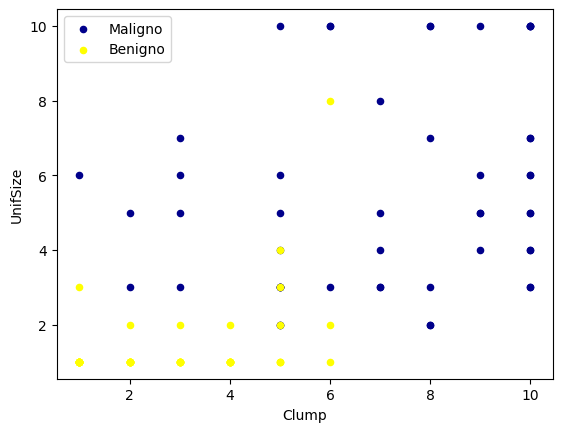

In [34]:
import matplotlib.pyplot as plt

ax = cell_df[cell_df["Class"] == 1][0:50].plot(kind="scatter", x="Clump", y="UnifSize", color="DarkBlue", label="Maligno")
ax = cell_df[cell_df["Class"] == 0][0:50].plot(kind="scatter", x="Clump", y="UnifSize", color="Yellow", label="Benigno",
     ax=ax)
plt.show()

# Pre-procesamiento de datos y selección

In [12]:
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

# Eliminación de renglones no numéricos en BareNuc

In [13]:
cell_df = cell_df[pd.to_numeric(cell_df["BareNuc"], errors = "coerce").notnull()]
cell_df["BareNuc"] = cell_df["BareNuc"].astype("int")
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

# Quitar la columna ID

In [15]:
feature_df = cell_df[["Clump", "UnifSize", "UnifShape", "MargAdh", "SingEpiSize", "BareNuc", "BlandChrom", "NormNucl", "Mit"]]
X = np.asarray(feature_df)
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

In [18]:
cell_df["Class"] = cell_df["Class"].astype("int")
y = np.asarray(cell_df["Class"])
y[0:5]

array([0, 0, 0, 0, 0])

# Creación de grupos de entrenamiento y prueba

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print("Grupo de entrenamiento", X_train.shape, y_train.shape)
print("Grupo de prueba", X_test.shape, y_test.shape)

Grupo de entrenamiento (546, 9) (546,)
Grupo de prueba (137, 9) (137,)


# Modelación con SVM

# Opciones de Kernel (Transformaciones):

In [ ]:
1. Linear 
2. Polynomial
3. Radial Basis Function (RBF)
4. Sigmoid

In [21]:
from sklearn import svm
clf = svm.SVC(kernel="rbf")
clf.fit(X_train, y_train)

SVC()

# Predicción para la base de prueba.

In [22]:
yhat = clf.predict(X_test)
yhat[0:5]

array([0, 1, 0, 1, 0])

# Creación de matriz de confusión

In [23]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X)
cm = confusion_matrix(y_test, yhat)
cm

array([[85,  5],
       [ 0, 47]], dtype=int64)

In [24]:
y_test

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1])

In [26]:
yhat

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1])

In [27]:
z = y_test - yhat
z

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0])

# Visualización de la matriz de confusión

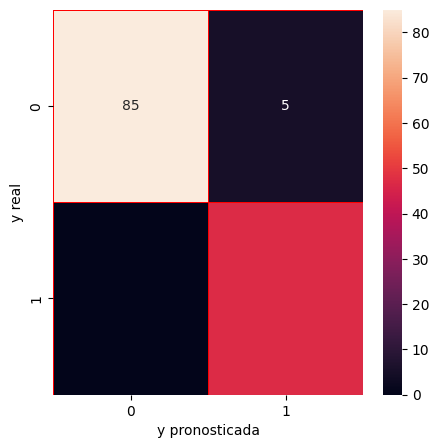

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))

sns.heatmap(cm, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y pronosticada")
plt.ylabel("y real")
plt.show()

# Estadísticas de desempeño.

In [36]:
from sklearn.metrics import classification_report 
cnf_matrix = confusion_matrix(y_test, yhat, labels= [0,1])
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        90
           1       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



# Determinación de niveles de precisión (Precision)

In [ ]:
La precisión = Porcentaje de predicciones correctas relativas al total de predicciones
*El total se calcula por columna
*Se contesta a la pregunta: ¿Qué porcentaje de las veces que hacemos un pronóstico de cierto tipo éste es correcto?

In [37]:
PrecisionBenigno = cm[0,0] / (cm[0,0] + cm[1,0])
PrecisionBenigno

1.0

In [38]:
PrecisionMaligno = cm[1,1] / (cm[1,1] + cm[0,1])
PrecisionMaligno

0.9038461538461539

# Determinación de niveles de Recuperación (Recall)

In [ ]:
La Recuperación (recall) = Es el porcentaje de predicciones correctas relativas al total de valores reales.
*El total se calcula por renglón
*Se contesta a la pregunta: ¿Qué porcentaje de las veces que se tiene un valor es capaz de identificarlo?

In [39]:
RecallBenigno = cm[0,0] / (cm[0,0] + cm[0,1])
RecallBenigno

0.9444444444444444

In [40]:
RecallMaligno = cm[1,1] / (cm[1,0] + cm[1,1])
RecallMaligno

1.0

# Determinación del Score F1

In [ ]:
F1 Score = Media armónica ponderada de la precisión y la recuperación. Cuanto más se acerque a 1, mejor será el modelo.
*F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

In [41]:
F1Benigno = 2 * (PrecisionBenigno * RecallBenigno) / (PrecisionBenigno + RecallBenigno)
F1Benigno

0.9714285714285714

In [42]:
F1Maligno = 2 * (PrecisionMaligno * RecallMaligno) / (PrecisionMaligno + RecallMaligno)
F1Maligno

0.9494949494949495

# Determinación de soportes.

In [ ]:
Soporte = Número de observaciones que pertenecen en forma real a cada clase posible(Total por renglón)

In [44]:
SoporteBenigno = cm[0,0] + cm[0,1]
SoporteBenigno

90

In [45]:
SoporteMaligno = cm[1,0] + cm[1,1]
SoporteMaligno

47

# Determinación de la Precisión Global (Accuracy)

In [ ]:
Accuracy = Porcentaje de predicciones correctas

In [46]:
Correctos = cm[0,0] + cm[1,1]
Incorrectos = cm[0,1] + cm[1,0]
PrecisionGlobal = Correctos / (Correctos + Incorrectos)
PrecisionGlobal

0.9635036496350365

# Promedios simples por indicador (Macro Average)

In [ ]:
Promedio simple por precision, recuperación y F1 Score

In [47]:
MacroAvgPrecision = (PrecisionBenigno + PrecisionMaligno) / 2
MacroAvgPrecision

0.9519230769230769

In [48]:
MacroAvgRecall = (RecallBenigno + RecallMaligno) / 2
MacroAvgRecall

0.9722222222222222

In [49]:
MacroF1Score = (F1Benigno + F1Maligno) / 2
MacroF1Score

0.9604617604617605

# Promedios ponderados por indicador (Weighted Average)

In [ ]:
Promedios ponderados de acuerdo a soportes por indicador

In [50]:
PesoBenigno = SoporteBenigno / (SoporteBenigno + SoporteMaligno)
PesoMaligno = SoporteMaligno / (SoporteBenigno + SoporteMaligno)

In [51]:
WAvgPrecision = PrecisionBenigno * PesoBenigno + PrecisionMaligno * PesoMaligno
WAvgPrecision

0.967012914093206

In [52]:
WAvgRecall = RecallBenigno * PesoBenigno + RecallMaligno * PesoMaligno
WAvgRecall

0.9635036496350364

In [53]:
WAvgF1Score = F1Benigno * PesoBenigno + F1Maligno * PesoMaligno
WAvgF1Score

0.9639038982104675

# Prueba de SVM con Kernel Lineal

In [54]:
clf = svm.SVC(kernel="linear")
clf.fit(X_train, y_train)

yhat = clf.predict(X_test)

#matriz de confusión
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X)
cm = confusion_matrix(y_test, yhat)
cm

array([[85,  5],
       [ 0, 47]], dtype=int64)

In [55]:
from sklearn.metrics import classification_report 
cnf_matrix = confusion_matrix(y_test, yhat, labels= [0,1])
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        90
           1       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



# Prueba de SVM con Kernel Polinomial

In [57]:
clf = svm.SVC(kernel="poly")
clf.fit(X_train, y_train)

yhat = clf.predict(X_test)

#matriz de confusión
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X)
cm = confusion_matrix(y_test, yhat)
cm

array([[86,  4],
       [ 0, 47]], dtype=int64)

In [58]:
from sklearn.metrics import classification_report 
cnf_matrix = confusion_matrix(y_test, yhat, labels= [0,1])
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        90
           1       0.92      1.00      0.96        47

    accuracy                           0.97       137
   macro avg       0.96      0.98      0.97       137
weighted avg       0.97      0.97      0.97       137



# Prueba de SVM con Kernel Sigmoide

In [60]:
clf = svm.SVC(kernel="sigmoid")
clf.fit(X_train, y_train)

yhat = clf.predict(X_test)

#matriz de confusión
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X)
cm = confusion_matrix(y_test, yhat)
cm

array([[54, 36],
       [47,  0]], dtype=int64)

In [61]:
from sklearn.metrics import classification_report 
cnf_matrix = confusion_matrix(y_test, yhat, labels= [0,1])
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.53      0.60      0.57        90
           1       0.00      0.00      0.00        47

    accuracy                           0.39       137
   macro avg       0.27      0.30      0.28       137
weighted avg       0.35      0.39      0.37       137

